In [1]:
#importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the dataset

data = pd.read_csv("Electric Vehicle Sales by State in India.csv")

In [3]:
# check the shape of the dataset

data.shape

(96845, 8)

In [4]:
data.columns.nunique()

8

In [5]:
data.columns.unique()

Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')

In [6]:
#first five rows of the dataset

data.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [7]:
#last five rows of the dataset

data.tail()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
96840,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0
96844,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (PASSENGER),3-Wheelers,3W_Shared,0.0


In [8]:
#values countfor year
data['Year'].value_counts()

Year
2019.0    10315
2023.0    10279
2018.0    10225
2022.0    10021
2017.0     9799
2016.0     9348
2021.0     9249
2015.0     9052
2014.0     9022
2020.0     8675
2024.0      860
Name: count, dtype: int64

In [9]:
#values count for the state
data['State'].value_counts()

State
Maharashtra                 4912
Karnataka                   4830
Uttar Pradesh               4557
Rajasthan                   4552
Gujarat                     4517
West Bengal                 4196
Tamil Nadu                  4063
Odisha                      4027
Haryana                     3842
Kerala                      3666
Chhattisgarh                3590
Madhya Pradesh              3587
Andhra Pradesh              3457
Assam                       3114
Uttarakhand                 3045
Himachal Pradesh            2980
Punjab                      2950
Jharkhand                   2773
Bihar                       2544
Jammu and Kashmir           2292
Arunachal Pradesh           2285
Goa                         2139
DNH and DD                  1927
Delhi                       1871
Meghalaya                   1867
Puducherry                  1832
Manipur                     1632
Nagaland                    1588
Tripura                     1564
Mizoram                     1557
Chan

In [10]:
#values count for vehicle class
data['Vehicle_Class'].value_counts()

Vehicle_Class
MOTOR CAR                           4111
M-CYCLE/SCOOTER                     4101
GOODS CARRIER                       4096
MOTOR CAB                           3985
BUS                                 3813
                                    ... 
SEMI-TRAILER (COMMERCIAL)             18
X-RAY VAN                             12
MOTOR CYCLE/SCOOTER-WITH TRAILER       9
MODULAR HYDRAULIC TRAILER              3
MOTOR CARAVAN                          3
Name: count, Length: 73, dtype: int64

In [11]:
#values count for vehicle category
data['Vehicle_Category'].value_counts()

Vehicle_Category
Others        54423
2-Wheelers    13121
3-Wheelers    11491
Bus            9119
4-Wheelers     8691
Name: count, dtype: int64

In [12]:
#values count for vehicle type
data['Vehicle_Type'].value_counts()

Vehicle_Type
Others                54423
2W_Personal           11700
Bus                    7026
4W_Shared              4580
4W_Personal            4111
3W_Shared              3786
3W_Goods               3208
Institution Bus        2093
3W_Shared_LowSpeed     1951
3W_Goods_LowSpeed      1517
2W_Shared              1421
3W_Personal            1029
Name: count, dtype: int64

In [13]:
#statistics for EV sales quantity
data['EV_Sales_Quantity'].describe()

count    96845.000000
mean        37.108896
std        431.566675
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20584.000000
Name: EV_Sales_Quantity, dtype: float64

In [14]:
#checking the duplicates and missing values

duplicates = data.duplicated().sum()
print(duplicates)

0


In [15]:
missing_values = data.isnull().sum()
print(missing_values)

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


In [16]:
#check the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [17]:
data['Year'] = data['Year'].astype(int)
data['Year'].dtype

dtype('int64')

In [18]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Date'].dtype

dtype('<M8[ns]')

In [19]:
categorical_columns = ['Month_Name','State','Vehicle_Class','Vehicle_Category', 'Vehicle_Type']
data[categorical_columns] = data[categorical_columns].astype('category')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               96845 non-null  int64         
 1   Month_Name         96845 non-null  category      
 2   Date               96845 non-null  datetime64[ns]
 3   State              96845 non-null  category      
 4   Vehicle_Class      96845 non-null  category      
 5   Vehicle_Category   96845 non-null  category      
 6   Vehicle_Type       96845 non-null  category      
 7   EV_Sales_Quantity  96845 non-null  float64       
dtypes: category(5), datetime64[ns](1), float64(1), int64(1)
memory usage: 2.7 MB


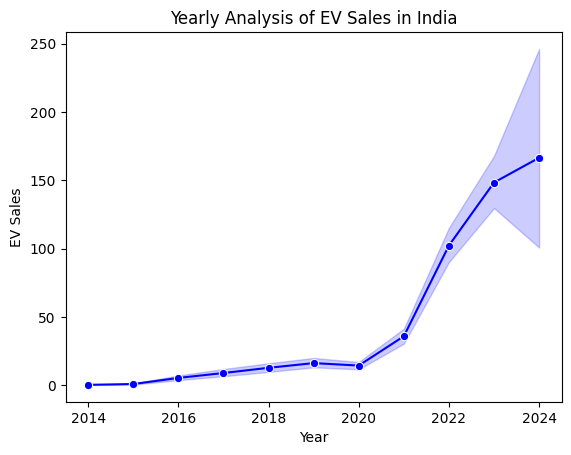

In [21]:
#data visualisation

plt.Figure(figsize=(6,4))
plt.title('Yearly Analysis of EV Sales in India')
sns.lineplot(x='Year' , y='EV_Sales_Quantity' ,data=data, marker='o', color='b' )
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.show()


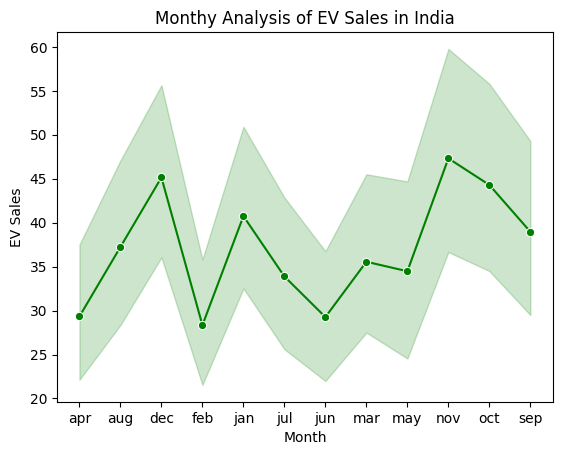

In [22]:
plt.Figure(figsize=(6,4))
plt.title('Monthy Analysis of EV Sales in India')
sns.lineplot(x='Month_Name', y='EV_Sales_Quantity', data=data, marker='o', color='g')
plt.xlabel("Month")
plt.ylabel("EV Sales")
plt.show()

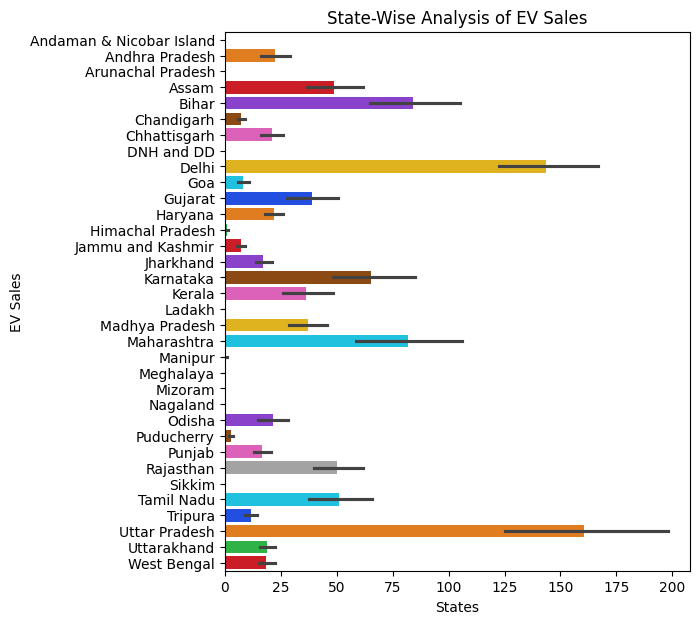

In [30]:
plt.figure(figsize=(6,7))
plt.title('State-Wise Analysis of EV Sales')
sns.barplot(y='State', x='EV_Sales_Quantity', data=data, hue='State', palette='bright')
plt.xlabel('States')
plt.ylabel('EV Sales')
plt.show()


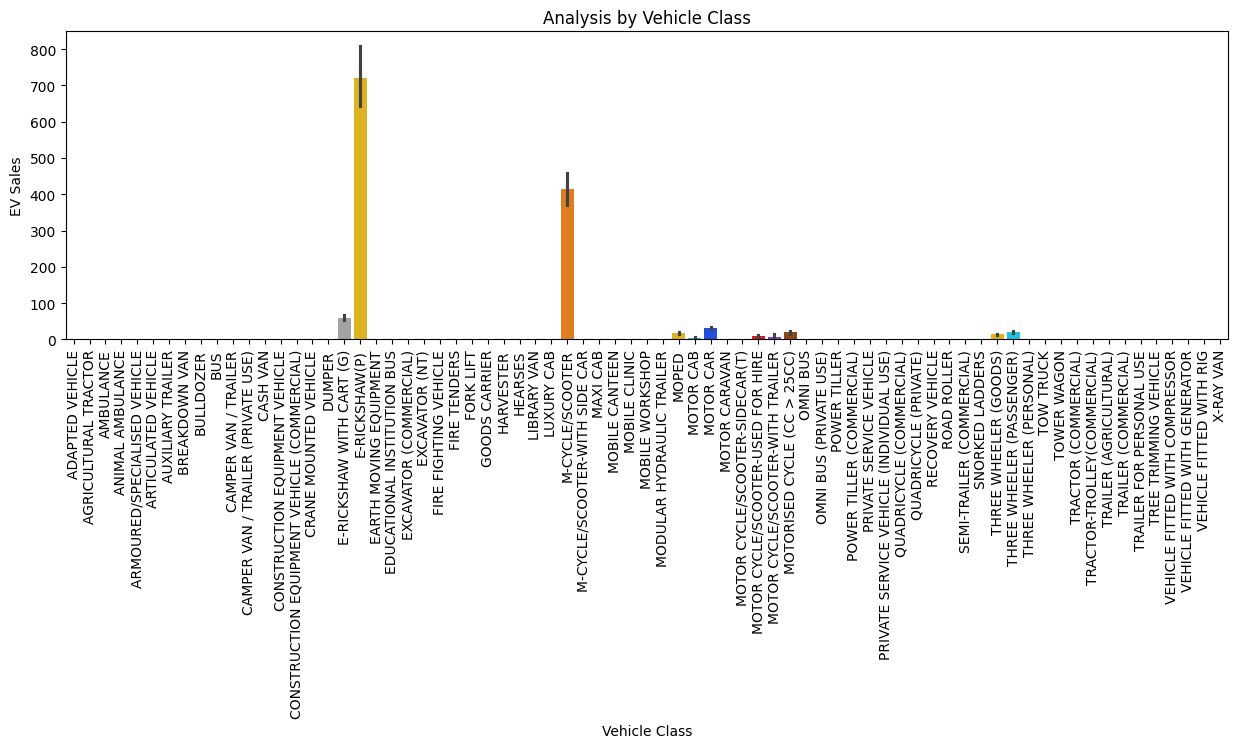

In [40]:
plt.figure(figsize=(15,4))
sns.barplot(x='Vehicle_Class', y='EV_Sales_Quantity',data=data, hue='Vehicle_Class', palette='bright')
plt.title('Analysis by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('EV Sales')
plt.xticks(rotation=90)
plt.show()

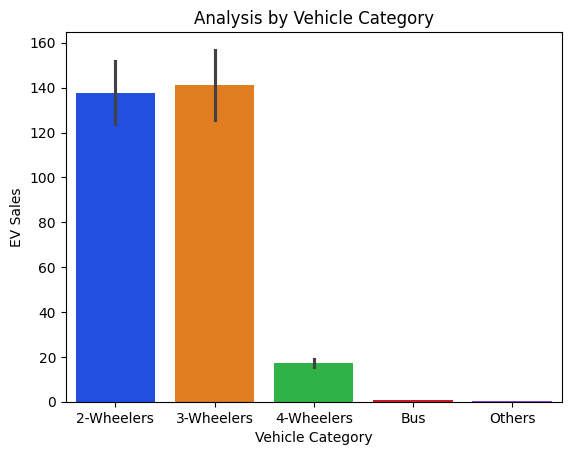

In [44]:
plt.Figure(figsize=(6,4))
plt.title("Analysis by Vehicle Category")
sns.barplot(x='Vehicle_Category', y='EV_Sales_Quantity', data=data, hue='Vehicle_Category', palette='bright')
plt.xlabel('Vehicle Category')
plt.ylabel('EV Sales')
plt.xticks(rotation=0)
plt.show()

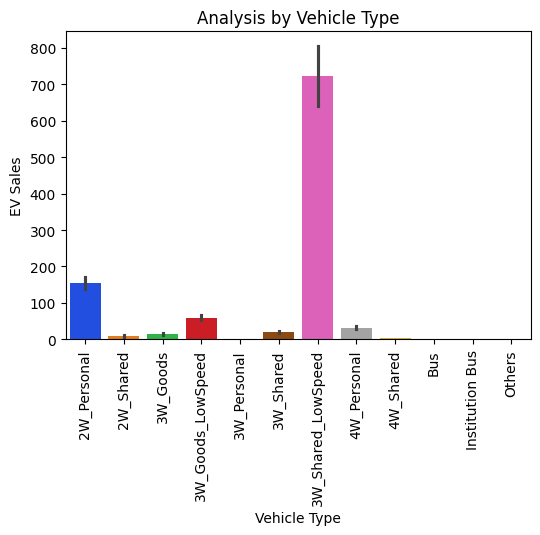

In [45]:
plt.figure(figsize=(6,4))
sns.barplot(x='Vehicle_Type', y='EV_Sales_Quantity',data=data, hue='Vehicle_Type', palette='bright')
plt.title('Analysis by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('EV Sales')
plt.xticks(rotation=90)
plt.show()